In [1]:
#导入相应的库包
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)  #消除警告

In [2]:
def LoadData(filename):
    data = []
    label = []
    with open(filename) as f:                               
        for line in f.readlines():     #按行读取
            ### START THE CODE ###                                              
            datalist = line.split()                                    #消除分隔符
            data.append([float64(datalist[0]),float64(datalist[1])])   #将特征存放到Data中
            label.append(float64(datalist[2]))                         #将标签存放到Label中
            ### END THE CODE ###
    return data,label

In [3]:
TrainData, TrainLabel = LoadData('DataSet.txt')
print ("TrainData = ",TrainData[:3])
print ("TrainLabel = ",TrainLabel[:3])

TrainData =  [[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003]]
TrainLabel =  [-1.0, -1.0, 1.0]


In [4]:
class DataOp(object):
    def __init__(self,data,label,C,toler):      #定义构造函数
        self.X = data                           #数据
        self.label = label                      #标签
        self.C = C                              #松弛变量
        self.tol = toler                        #容忍度
        self.m = shape(data)[0]                 #特征向量的第一个维度
        self.alpha = mat(zeros((self.m,1)))     #Alpha个数初始化
        self.b = 0                              #步长
        self.Cache = mat(zeros((self.m,2)))     #第一列给出是否有效 第二列给出的是实际的E值       

In [5]:
oS = DataOp(mat(TrainData), mat(TrainLabel).transpose(), 0.6, 0.001)

In [6]:
def  SelectAlpha(i,m):
    j = i
    while (j == i):
        j = int(random.uniform(0,m))  
    return j

In [7]:
def ResetAlpha(Alphaj,low,high):
    ### STARD CODE HERE ###
    if Alphaj > high :
        Alphaj = high
    elif Alphaj >= low and Alphaj <= high :
        Alphaj = Alphaj
    else:
        Alphaj = low
    
    ### END CODE HERE ###
    return Alphaj

In [8]:
a = 10
b = ResetAlpha(a,11,20)
c = ResetAlpha(a,1,8)
print("b = ", b)
print("c = ", c)

b =  11
c =  8


In [9]:
def ComputeEk(os,k):
    PredictK = float(multiply(os.alpha,os.label).T * (os.X*os.X[k,:].T)) + os.b
    ### START CODE HERE ###
    Ek = PredictK - os.label[k]
    ### END CODE HERE ###
    return Ek

In [10]:
Ek1 = ComputeEk(oS,25)
Ek2 = ComputeEk(oS,30)
print ("Ek1 = ", Ek1)
print ("Ek2 = ", Ek2)

Ek1 =  [[-1.]]
Ek2 =  [[1.]]


In [11]:
def SelectMaxj(i,oS,Ei):
    MaxK = -1              #保存最大下标值
    MaxDeltaE = 0          #保存最大步长
    Ej = 0
    oS.Cache[i] = [1,Ei]   #首先将输入值Ei在缓存中设置为有效的。这里意味着它已经计算好了
    List = nonzero(oS.Cache[:,0].A)[0]
    if (len(List)) > 1:               # 在所有的值上进行循环，并选择使得改变最大的那个值
        for k in List:
            if k == i:                
                continue             #不计算
            ### START CODE HERE ###            
            DeltaE = abs(Ei - ComputeEk(oS,k))         # 计算DeltaE
            if DeltaE > MaxDeltaE :                    #DeltaE > MaxDeltaE , 则进行更新                  
                MaxK = k                               #更新下标
                MaxDeltaE = DeltaE                     #最大值更新
                Ej = ComputeEk(oS,k)                   #替换Ej
            ### END CODE HERE ###
        return MaxK, Ej
    else:                                #如果是第一次循环，则随机选择一个alpha
        j = SelectAlpha(i,oS.m)    
        Ej = ComputeEk(oS,j)
    return j,Ej

In [12]:
Data =  [[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003], [2.114999, -0.004466], [8.127113, 1.274372]]
Label =  [-1.0, -1.0, 1.0, -1.0, 1.0]
TestOs = DataOp(mat(Data),mat(Label).transpose(),0.6,0.001)
TestEi = ComputeEk(TestOs,0)
TestOs.Cache[1] = [1,ComputeEk(TestOs,1)]
TestOs.Cache[2] = [1,ComputeEk(TestOs,2)]
TestOs.Cache[3] = [1,ComputeEk(TestOs,3)]
TestOs.Cache[4] = [1,ComputeEk(TestOs,4)]
Testj,TestEj = SelectMaxj(0,TestOs,TestEi)

print ("Testj = ",Testj)
print ("TestEj = ", TestEj)

Testj =  2
TestEj =  [[-1.]]


In [13]:
def updataEk(oS,k):
    ###START THE CODE ###
    Ek = ComputeEk(oS,k)                                                   #计算Ek
    oS.Cache[k] = [1, Ek]                                                  #更新第k行的oS.Cache[k]
    ###END THE CODE ###

In [14]:
TestOs = DataOp(mat(Data),mat(Label).transpose(),0.6,0.001)
updataEk(TestOs,0)
updataEk(TestOs,1)
updataEk(TestOs,2)
print ("TestOs.Cache[0] = ",TestOs.Cache[0])
print ("TestOs.Cache[1] = ",TestOs.Cache[1])
print ("TestOs.Cache[2] = ",TestOs.Cache[2])

TestOs.Cache[0] =  [[1. 1.]]
TestOs.Cache[1] =  [[1. 1.]]
TestOs.Cache[2] =  [[ 1. -1.]]


In [15]:
def InsideCycle(i,oS):
    Ei = ComputeEk(oS,i)   #求Ek误差
    #约束条件（KKT条件是解决最优化问题时用到的一种方法。我们这里提到的最优化问题通常
    #是指对于给定的某一函数，求其在指定作用域上的全局最小值
    #0<=alpha[i]<=C,但由于0和C是边界值，我们无法进行优化，因为需要升高一个alpha和降低一个alpha。
    #表示发生错误的概率：label[i]*Ei ,如果超出toler，才需要优化。至于正负号，考虑绝对值就行
    
    #检验训练样本(xi,yi)是否满足KKT条件
    #yi*f(xi) >= 1 and alpha = 0 (outside the boundary)
    #yi*f(xi) == 1 0<alpha<C     (on the boundary)
    #yi*f(xi) <= 1 and alpha = C  (between the boundary)
    
    if ((oS.label[i] * Ei < -oS.tol) and (oS.alpha[i] < oS.C)) or ((oS.label[i] * Ei > oS.tol) and (oS.alpha[i] > 0)):
        #选择最大的误差对应的j进行优化。
        j,Ej = SelectMaxj(i,oS,Ei)
        IOldAlpha = oS.alpha[i].copy()
        JOldAlpha = oS.alpha[j].copy()
        
        #L 和 H将用于将alpha[j]调整到0-C之间。如果L == H，就不做任何改变，直接Return 0
        if (oS.label[i] != oS.label[j]):
            L = max(0,oS.alpha[j] - oS.alpha[i])
            H = min(oS.C, oS.C + oS.alpha[j] - oS.alpha[i])
        else:
            L = max(0,oS.alpha[j] + oS.alpha[i] - oS.C)
            H = min(oS.C, oS.alpha[j] + oS.alpha[i])
        
        if L == H:
            #print ("L == H")
            return 0
        
        #eva 是alpha[j]的最优修改量，如果eva==0，需要退出for循环当前迭代过程
        eva = 2.0 * oS.X[i, :] * oS.X[j, :].T - oS.X[i, :] * oS.X[i, :].T - oS.X[j, :] * oS.X[j, :].T
        if eva >= 0:
            #print("eva >= 0")
            return 0
        
        #计算一个新的alpha[j]值
        oS.alpha[j] -= oS.label[j] * (Ei-Ej) / eva
        #并使用辅助函数，以及L和H对其进行调整
        oS.alpha[j] = ResetAlpha(oS.alpha[j],L,H)
        #更新缓存误差
        updataEk(oS,j)
        
        #检查alpha[j]是否只是轻微的改变，如果是的话，就退出for循环
        if (abs(oS.alpha[j] - JOldAlpha) < 0.00001):
            return 0
        
        #然后alpha[i]和alpha[j]做同样的修改，虽然改变的大小一样，但是改变的方向相反
        oS.alpha[i] += oS.label[j] * oS.label[i] * (JOldAlpha - oS.alpha[j])
        #更新误差缓存
        updataEk(oS,i)
        
        #在对alpha[i],alpha[j]进行优化之后，给这个两个alpha值设置一个常数b。
        '''
         w= Σ[1~n] ai*yi*xi => b = yj Σ[1~n] ai*yi(xi*xj)
         所以：  b1 - b = (y1-y) - Σ[1~n] yi*(a1-a)*(xi*x1)
         为什么减2遍？ 因为是 减去Σ[1~n]，正好2个变量i和j，所以减2遍
        '''
        b1 = oS.b - Ei - oS.label[i] * (oS.alpha[i] - IOldAlpha) * oS.X[i, :] * oS.X[i, :].T - oS.label[j] * (oS.alpha[j] - JOldAlpha) * oS.X[i, :] * oS.X[j, :].T
        b2 = oS.b - Ej - oS.label[i] * (oS.alpha[i] - IOldAlpha) * oS.X[i, :] * oS.X[j, :].T - oS.label[j] * (oS.alpha[j] - JOldAlpha) * oS.X[j, :] * oS.X[j, :].T
        if (0 < oS.alpha[i]) and (oS.C > oS.alpha[i]):
            oS.b = b1
        elif (0 < oS.alpha[j]) and (oS.C > oS.alpha[j]):
            oS.b = b2
        else:
            oS.b = (b1+b2) / 2.0
        return 1
    else:
        return 0

In [16]:
def Smo(oS,IterStep):
    iter = 0                #迭代次数
    EntireSet = True         #是否遍历了没有遍历整个alpha值
    AlphaChanged = 0          #alpha改变的次数
    
    #循环迭代结束 或者 循环遍历所有alpha后，AlphaChanged还是没变化
    
    while (iter < IterStep) and ((AlphaChanged > 0) or (EntireSet)):
        AlphaChanged = 0
        #当EntireSet = True or 非边界alpha对没有了；就开始寻找alpha对，然后决定是否else。
        if EntireSet:
            #在数据集上遍历所有可能的alpha
            for i in range(oS.m):
                #是否存在alpha对，存在就+1
                AlphaChanged += InsideCycle(i,oS)
            iter += 1
        #对已存在alpha对，选出非边界的alpha值，进行优化。
        else:
            #遍历所有非边界alpha值，进行优化。
            nonBoundIs = nonzero((oS.alpha.A > 0) * (oS.alpha.A < oS.C))[0]
            for i in nonBoundIs:
                AlphaChanged += InsideCycle(i,oS)
               
            iter += 1
        
        #如果找到alpha对，就优化非边界alpha值，否则，就重新进行寻找，如果寻找一遍 遍历所有的行还是没找到，就退出循环。
        if EntireSet:
            EntireSet = False
        elif (AlphaChanged == 0):
            EntireSet = True
    return oS.b, oS.alpha

In [17]:
b, alphas = Smo(oS, 40)
print ("b = ", b)
print ("alphas = ",alphas[50:55])

b =  [[-2.89901748]]
alphas =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [18]:
def ComputeW(alphas,data,label):
    Data = mat(data)                 #转换为矩阵形式
    Label = mat(label).transpose()
    
    m,n = shape(Data)                #数据的维度
    w = zeros((n,1))
    ### START THE CODE ###
                                     
    w = np.dot(Data.T, np.multiply(mat(alphas),Label))                              #根据计算公式求取w
    ### END THE CODE ###
    return w
    

In [19]:
Testalphas =[[0.        ],[0.        ],[0.08999025],[0.        ],[0.04439791]]
w = ComputeW(Testalphas,TrainData[50:55],TrainLabel[50:55])
print ("w = ", w)

w =  [[-0.02568303]
 [ 0.04319313]]


In [20]:
W = ComputeW(alphas,TrainData,TrainLabel)

In [21]:
def PlotSVM(data,label,W,b,alphas):
    Data = mat(data)
    Label = np.squeeze(label)
    #b 原来是矩阵 先转化为数组类型后其数组大小为（1，1），然后后面加[0],变为（1，）
    b = array(b)[0]
    fig = plt.figure()
    figure = fig.add_subplot(111)
    
    figure.scatter(Data[:,0].flatten().A[0],Data[:,1].flatten().A[0])
    x = arange(-1.0,10.0,0.1)
    
    y = (-b-W[0,0]*x)/ W[1,0]  #画出分隔线
    figure.plot(x,y)
    
    ### START THE CODE ### 
                                #将正负样本点画在画布上
    pos=Data[Label[:]>0]
    neg=Data[Label[:]<0]
    
    figure.scatter(pos[:,0].flatten().A[0],pos[:,1].flatten().A[0],c='blue')
    figure.scatter(neg[:,0].flatten().A[0],neg[:,1].flatten().A[0],c='red')
    
    ###END THE CODE ###
    plt.show()

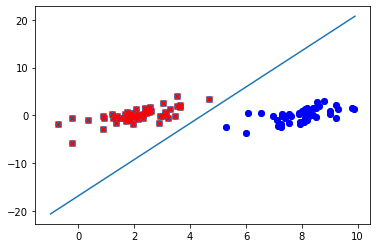

In [22]:
PlotSVM(TrainData,TrainLabel,W,b,alphas)

In [23]:
def KernelTransform(Data,DataI,Para):
    #计算Data的维度 【m,n】
    m,n = shape(Data)
    K = mat(zeros((m,1)))
    
    ### START THE CODE ###
                                #按照径向基函数公式求取K
    K = np.exp(-np.sum(np.square(mat(Data) - mat(DataI)), axis=1) / (2 * Para * Para))
    ### END THE CODE ###
    return K

In [24]:
TestData =  [[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003], [2.114999, -0.004466], [8.127113, 1.274372]]
TestDataI = [3.018896, 2.556416]
TestPara = 0.8
Result = KernelTransform(TestData,TestDataI,TestPara)
print ("Result = ", Result)

Result =  [[6.21201706e-01]
 [1.00000000e+00]
 [1.67499988e-13]
 [3.14534050e-03]
 [3.88031058e-10]]


In [25]:
def TrainAccuracy(TrainFileName,TestFileName,P,C,Toler,MaxIter):
    #导入数据
    Data,Label = LoadData(TrainFileName)

    #高斯核参数
    Para = P
    #转换为mat格式
    Data = mat(Data)
    Label = mat(Label).transpose()

    #计算拉格朗日乘子以及b
    oS = DataOp(Data,Label,C,Toler)
    b,alphas = Smo(oS,MaxIter)

    #获取alpha>0的行数
    UnZero = nonzero(alphas.A > 0)[0]
    SelectData = Data[UnZero]
    SelectLabel = Label[UnZero]
    SelectAlphas = alphas[UnZero]

    #获取Data的维度
    m, n = shape(Data)
    
    #获取测试数据集
    TestData,TestLabel = LoadData(TestFileName)
    TestCount = 0
    
    #转换格式
    TestData = mat(TestData)
    TestLabel = mat(TestLabel).transpose()
    m,n = shape(TestData)
    #遍历测试集每一行数据
    for i in range(m):
        #核函数转换
        K = KernelTransform(SelectData,TestData[i],Para)
        TestPredictValue = K.T*multiply(SelectLabel,SelectAlphas) + b
        #测试准确度
        if sign(TestPredictValue) != sign(TestLabel[i]):
            TestCount += 1
    print("The Test Error Rate is: %.1f%%" % (float(TestCount)*100 / m))
        
        

In [26]:
#训练数据
TrainFileName = 'KernelTrainData.txt'
#测试数据
TestFileName = 'KernelTestData.txt'
#SMO算法参数
C = 210
Toler = 0.0001
MaxIter = 10000
#径向基参数
Para = 0.12
TrainAccuracy(TrainFileName,TestFileName,Para,C,Toler,MaxIter)

The Test Error Rate is: 9.0%


In [27]:
#初始化一系列随机样本
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()  # 将多维数组降为一维

#调用sklearn库，实现LinearSVR
from sklearn.svm import LinearSVR
### START THE CODE ###
svr = LinearSVR(epsilon = 0.3)        #设定epsilon = 0.3,方便观察效果，支持向量均位于容忍区域外侧
svr.fit(X,y)                          #根据相关文档得到拟合模型
### END THE CODE  ###


#找到支持向量
def find_support(svr,X,y):
    y_pred=svr.predict(X)#计算预测值
    margin=(np.abs(y-y_pred) >= svr.epsilon)#判断是否为支持向量
    return np.argwhere(margin)

svr.support_=find_support(svr,X,y)#获取对应的支持向量对应下标，注意将变量名改为你自己的命名
    

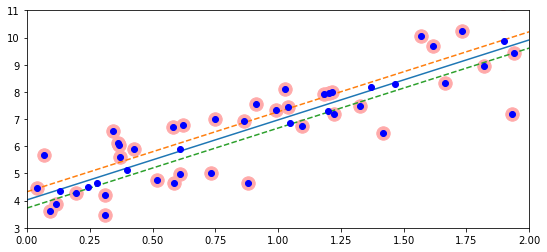

In [28]:

def plot_svr(svr,X,y,axes):
    xls=np.linspace(axes[0],axes[1],100).reshape(100,1)
    y_pred=svr.predict(xls)
    plt.plot(xls, y_pred, "-")
    plt.plot(xls, y_pred + svr.epsilon, "--")  
    plt.plot(xls, y_pred - svr.epsilon, "--")
    plt.plot(X, y, "bo")
    plt.scatter(X[svr.support_], y[svr.support_], s=180, facecolors='#FFAAAA')
    plt.axis(axes)
plt.figure(figsize=(9, 4))  # width, height in inches
plot_svr(svr, X, y, [0, 2, 3, 11]) #注意第一个参数改为自己的命名

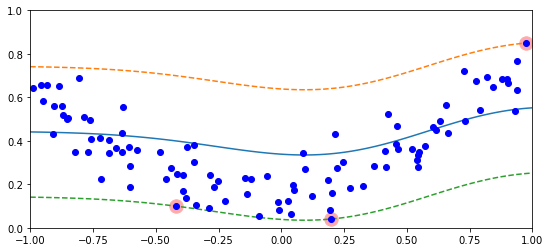

In [29]:
#初始化随机样本
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

#实现SVR
from sklearn.svm import SVR

### START THE CODE ###
svr_poly = SVR(epsilon = 0.3, C = 2.0)        #对初始化参数C进行调节观察结果
svr_poly.fit(X,y)                                   #拟合模型 
### END THE CODE  ###

plt.figure(figsize=(9, 4))
plot_svr(svr_poly, X, y, [-1, 1, 0, 1])